In [2]:
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Afficher toutes les colonnes sans troncature
pd.set_option('display.max_columns', None)

In [ ]:

df = pd.read_csv('../data/raw/bank_churn.csv')

print(f"Dataset chargé: {df.shape[0]} lignes, {df.shape[1]} colonnes")
print("\nPremières lignes:")
df.head()

Dataset chargé: 10000 lignes, 13 colonnes

Premières lignes:


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Distribution du Churn:
Churn
0    7963
1    2037
Name: count, dtype: int64

Pourcentages:
Churn
0    79.63
1    20.37
Name: proportion, dtype: float64


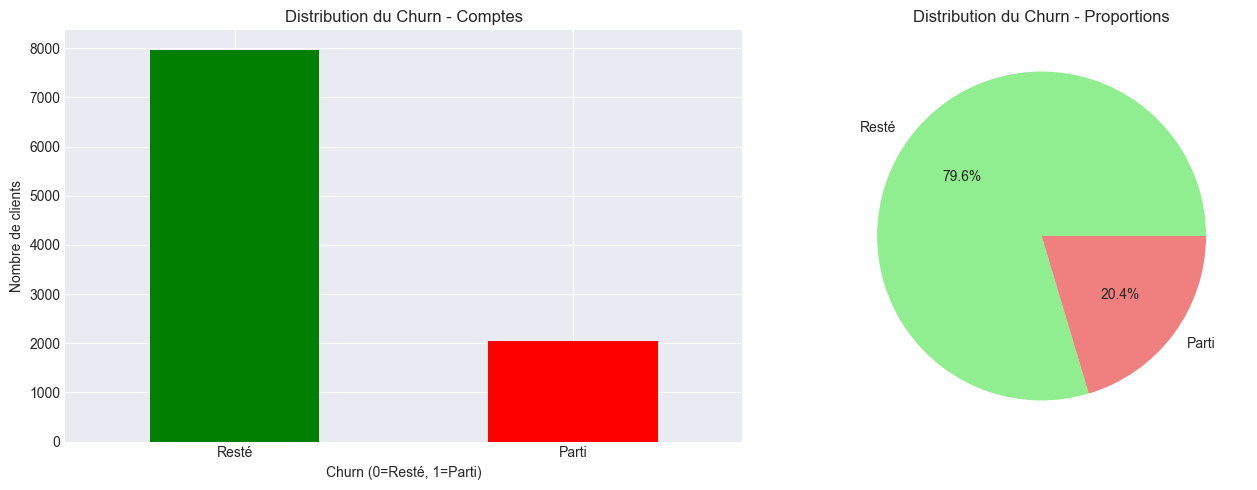

In [6]:
# Distribution de la variable cible
print("Distribution du Churn:")
print(df['Churn'].value_counts())
print("\nPourcentages:")
print(df['Churn'].value_counts(normalize=True) * 100)


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Bar chart (comptes)
df['Churn'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Distribution du Churn - Comptes')
axes[0].set_xlabel('Churn (0=Resté, 1=Parti)')
axes[0].set_ylabel('Nombre de clients')
axes[0].set_xticklabels(['Resté', 'Parti'], rotation=0)

# Graphique 2: Pie chart (proportions)
colors = ['lightgreen', 'lightcoral']
df['Churn'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                 colors=colors, labels=['Resté', 'Parti'])
axes[1].set_title('Distribution du Churn - Proportions')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [8]:
# Informations sur le dataset
print("Informations sur le dataset:")
print(df.info())

print("\n" + "="*50)
print("\nStatistiques descriptives:")
df.describe().T

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


Statistiques descriptives:


,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
Num Of Products,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
Has Credit Card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
Is Active Member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
Estimated Salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [9]:
# Analyse des variables catégorielles
print("Distribution par pays (Geography):")
print(df['Geography'].value_counts())
print(f"\nPourcentages:")
print(df['Geography'].value_counts(normalize=True) * 100)

print("\n" + "="*50)
print("\nDistribution par genre (Gender):")
print(df['Gender'].value_counts())
print(f"\nPourcentages:")
print(df['Gender'].value_counts(normalize=True) * 100)

Distribution par pays (Geography):
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Pourcentages:
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64


Distribution par genre (Gender):
Gender
Male      5457
Female    4543
Name: count, dtype: int64

Pourcentages:
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


In [10]:
# Taux de churn par pays
print("Taux de churn par pays:")
churn_by_geo = df.groupby('Geography')['Churn'].agg(['sum', 'count', 'mean'])
churn_by_geo.columns = ['Nombre partis', 'Total clients', 'Taux de churn']
churn_by_geo['Taux de churn'] = churn_by_geo['Taux de churn'] * 100
print(churn_by_geo)

print("\n" + "="*50)

# Taux de churn par genre
print("\nTaux de churn par genre:")
churn_by_gender = df.groupby('Gender')['Churn'].agg(['sum', 'count', 'mean'])
churn_by_gender.columns = ['Nombre partis', 'Total clients', 'Taux de churn']
churn_by_gender['Taux de churn'] = churn_by_gender['Taux de churn'] * 100
print(churn_by_gender)

Taux de churn par pays:
           Nombre partis  Total clients  Taux de churn
Geography                                             
France               810           5014      16.154767
Germany              814           2509      32.443204
Spain                413           2477      16.673395


Taux de churn par genre:
        Nombre partis  Total clients  Taux de churn
Gender                                             
Female           1139           4543      25.071539
Male              898           5457      16.455928


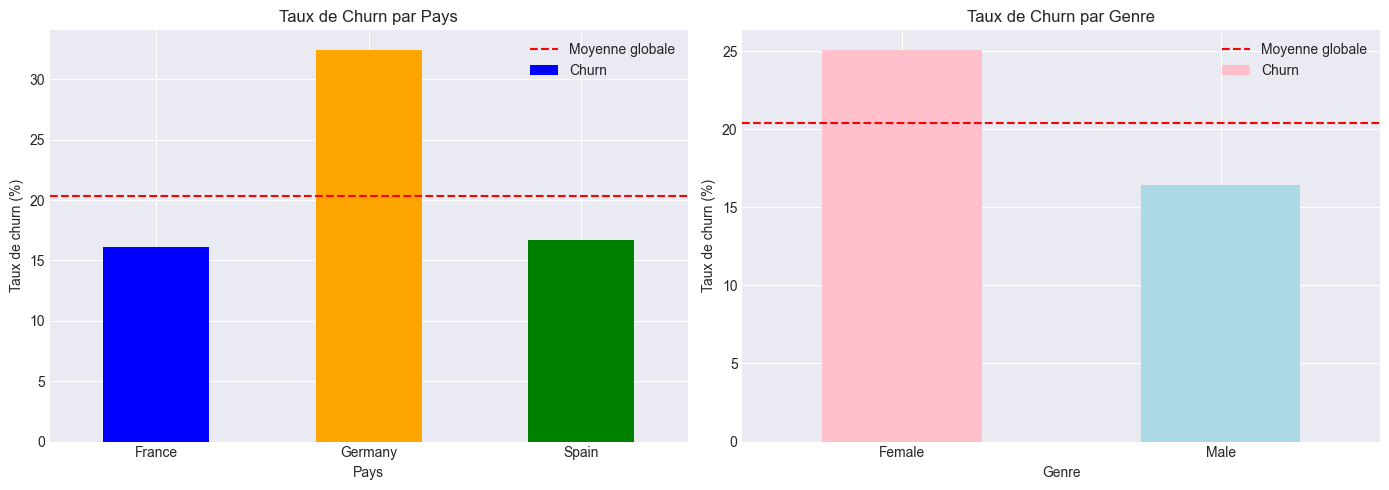

In [11]:
# Visualisation du churn par catégorie
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Churn par pays
churn_geo = df.groupby('Geography')['Churn'].mean() * 100
churn_geo.plot(kind='bar', ax=axes[0], color=['blue', 'orange', 'green'])
axes[0].set_title('Taux de Churn par Pays')
axes[0].set_ylabel('Taux de churn (%)')
axes[0].set_xlabel('Pays')
axes[0].axhline(y=20.37, color='red', linestyle='--', label='Moyenne globale')
axes[0].legend()
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Graphique 2: Churn par genre
churn_gender = df.groupby('Gender')['Churn'].mean() * 100
churn_gender.plot(kind='bar', ax=axes[1], color=['pink', 'lightblue'])
axes[1].set_title('Taux de Churn par Genre')
axes[1].set_ylabel('Taux de churn (%)')
axes[1].set_xlabel('Genre')
axes[1].axhline(y=20.37, color='red', linestyle='--', label='Moyenne globale')
axes[1].legend()
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [12]:
# Créer un tableau croisé du taux de churn
churn_cross = pd.crosstab(
    index=df['Geography'], 
    columns=df['Gender'], 
    values=df['Churn'], 
    aggfunc='mean'
) * 100

print("Taux de churn (%) par pays et genre:")
print(churn_cross.round(2))

print("\n" + "="*50)

# Compter le nombre de clients qui ont churn
churn_count = pd.crosstab(
    index=df['Geography'], 
    columns=df['Gender'], 
    values=df['Churn'], 
    aggfunc='sum'
)

print("\nNombre de clients partis par pays et genre:")
print(churn_count)

Taux de churn (%) par pays et genre:
Gender     Female   Male
Geography               
France      20.34  12.71
Germany     37.55  27.81
Spain       21.21  13.11


Nombre de clients partis par pays et genre:
Gender     Female  Male
Geography              
France        460   350
Germany       448   366
Spain         231   182


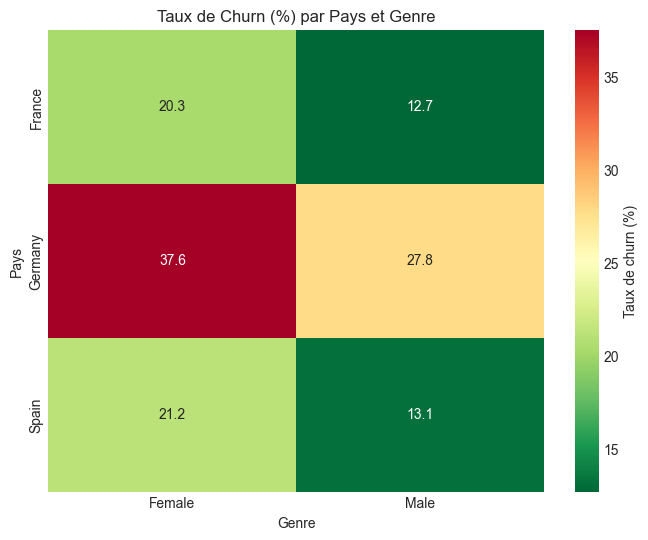

In [13]:
# Heatmap pour visualiser les taux de churn croisés
plt.figure(figsize=(8, 6))
sns.heatmap(churn_cross, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            cbar_kws={'label': 'Taux de churn (%)'})
plt.title('Taux de Churn (%) par Pays et Genre')
plt.ylabel('Pays')
plt.xlabel('Genre')
plt.show()

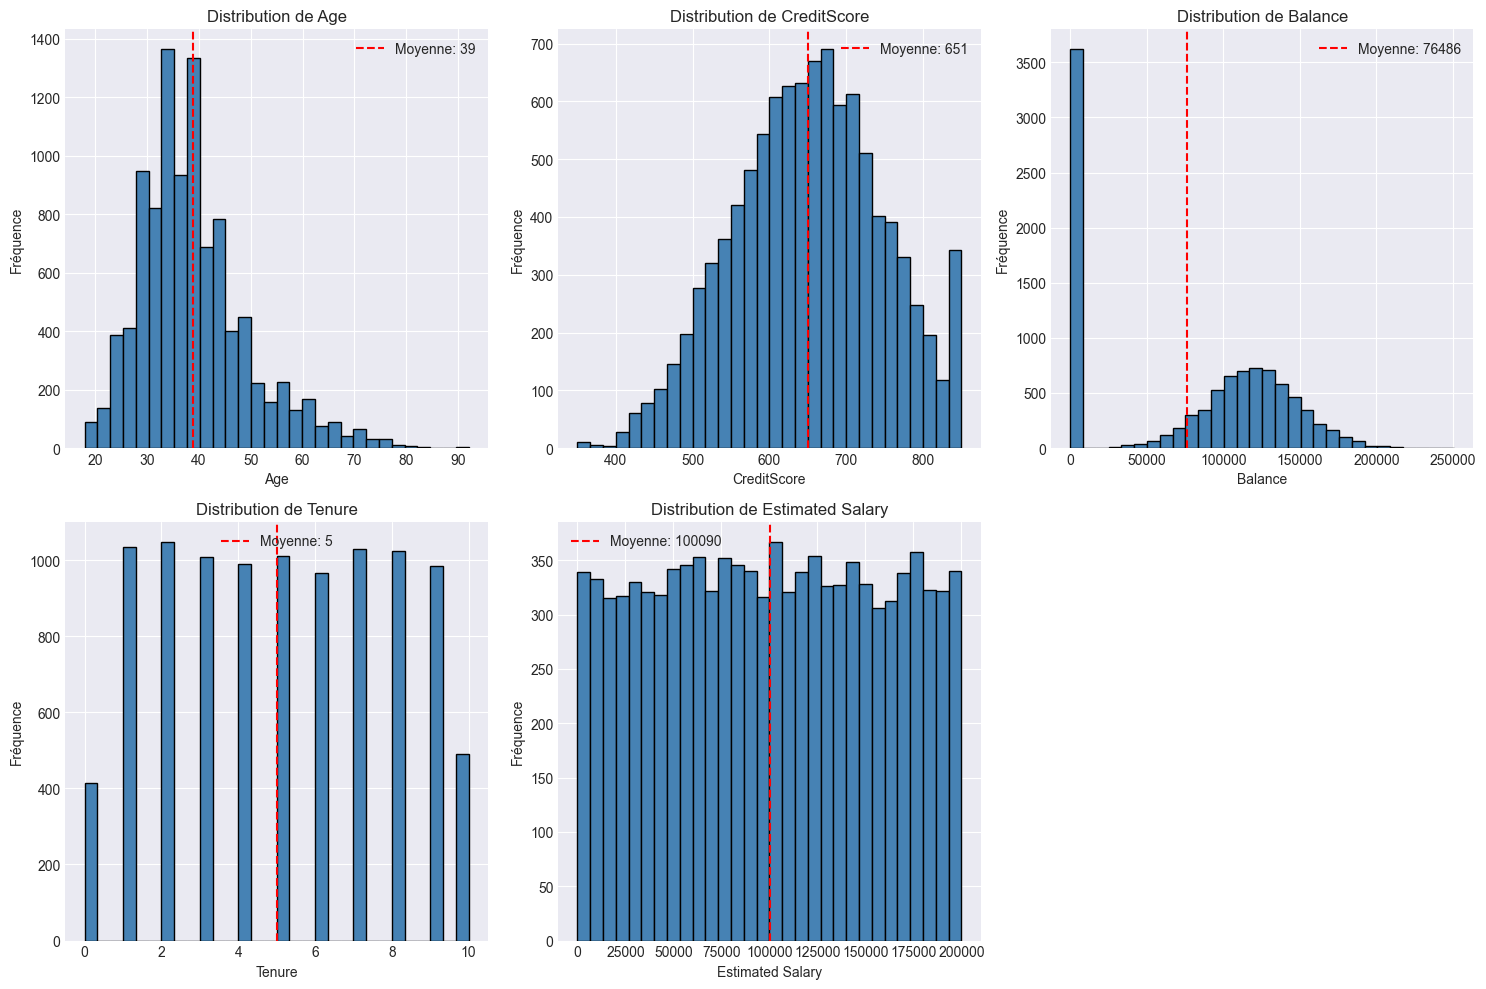

In [14]:
# Sélectionner les colonnes numériques importantes
numeric_cols = ['Age', 'CreditScore', 'Balance', 'Tenure', 'Estimated Salary']

# Créer des histogrammes pour chaque variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30, color='steelblue', edgecolor='black')
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')
    
    # Ajouter la moyenne en ligne rouge
    mean_val = df[col].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', 
                    label=f'Moyenne: {mean_val:.0f}')
    axes[i].legend()

# Supprimer le dernier subplot vide
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

Taux de churn selon Balance:
                     sum   count       mean
Has_Zero_Balance                           
0                 153700  638300  24.079586
1                  50000  361700  13.823611


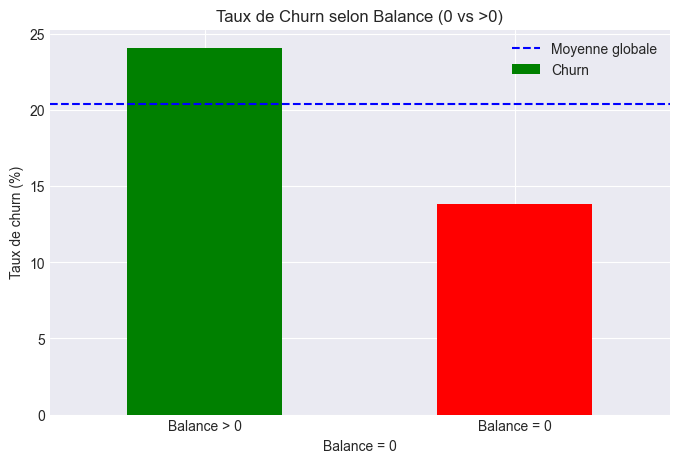

In [15]:
# Créer une variable binaire pour Balance = 0
df['Has_Zero_Balance'] = (df['Balance'] == 0).astype(int)

# Taux de churn selon le balance
print("Taux de churn selon Balance:")
print(df.groupby('Has_Zero_Balance')['Churn'].agg(['sum', 'count', 'mean']) * 100)

# Visualisation
fig, ax = plt.subplots(figsize=(8, 5))
churn_by_balance = df.groupby('Has_Zero_Balance')['Churn'].mean() * 100
churn_by_balance.plot(kind='bar', ax=ax, color=['green', 'red'])
ax.set_title('Taux de Churn selon Balance (0 vs >0)')
ax.set_xlabel('Balance = 0')
ax.set_xticklabels(['Balance > 0', 'Balance = 0'], rotation=0)
ax.set_ylabel('Taux de churn (%)')
ax.axhline(y=20.37, color='blue', linestyle='--', label='Moyenne globale')
ax.legend()
plt.show()

Taux de churn par tranche d'âge:
           Partis  Total       Taux
Age_Group                          
<30           148   1968   7.520325
30-40         538   4451  12.087171
40-50         788   2320  33.965517
50-60         448    797  56.210790
60+           115    464  24.784483


C:\Users\ibrah\AppData\Local\Temp\ipykernel_24532\3012096994.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = df.groupby('Age_Group')['Churn'].agg(['sum', 'count', 'mean'])


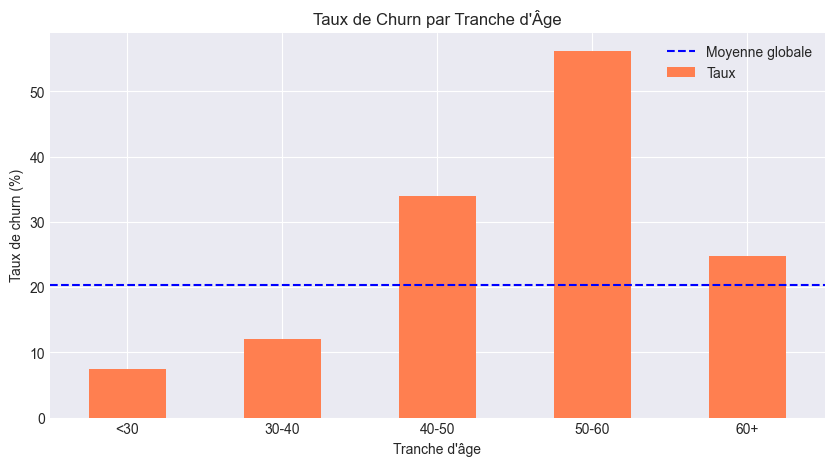

In [16]:
# Découper Age en tranches
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[0, 30, 40, 50, 60, 100], 
                         labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Taux de churn par tranche d'âge
churn_by_age = df.groupby('Age_Group')['Churn'].agg(['sum', 'count', 'mean'])
churn_by_age.columns = ['Partis', 'Total', 'Taux']
churn_by_age['Taux'] = churn_by_age['Taux'] * 100
print("Taux de churn par tranche d'âge:")
print(churn_by_age)

# Visualisation
plt.figure(figsize=(10, 5))
churn_by_age['Taux'].plot(kind='bar', color='coral')
plt.title('Taux de Churn par Tranche d\'Âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Taux de churn (%)')
plt.axhline(y=20.37, color='blue', linestyle='--', label='Moyenne globale')
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [17]:
# Segment ultra-risque
risk_segment = df[(df['Geography'] == 'Germany') & 
                  (df['Gender'] == 'Female') & 
                  (df['Age'] >= 50) & 
                  (df['Age'] < 60)]

print(f"Nombre de femmes allemandes 50-60 ans: {len(risk_segment)}")
print(f"Taux de churn: {risk_segment['Churn'].mean() * 100:.2f}%")
print(f"Nombre parties: {risk_segment['Churn'].sum()}")

Nombre de femmes allemandes 50-60 ans: 141
Taux de churn: 73.05%
Nombre parties: 103


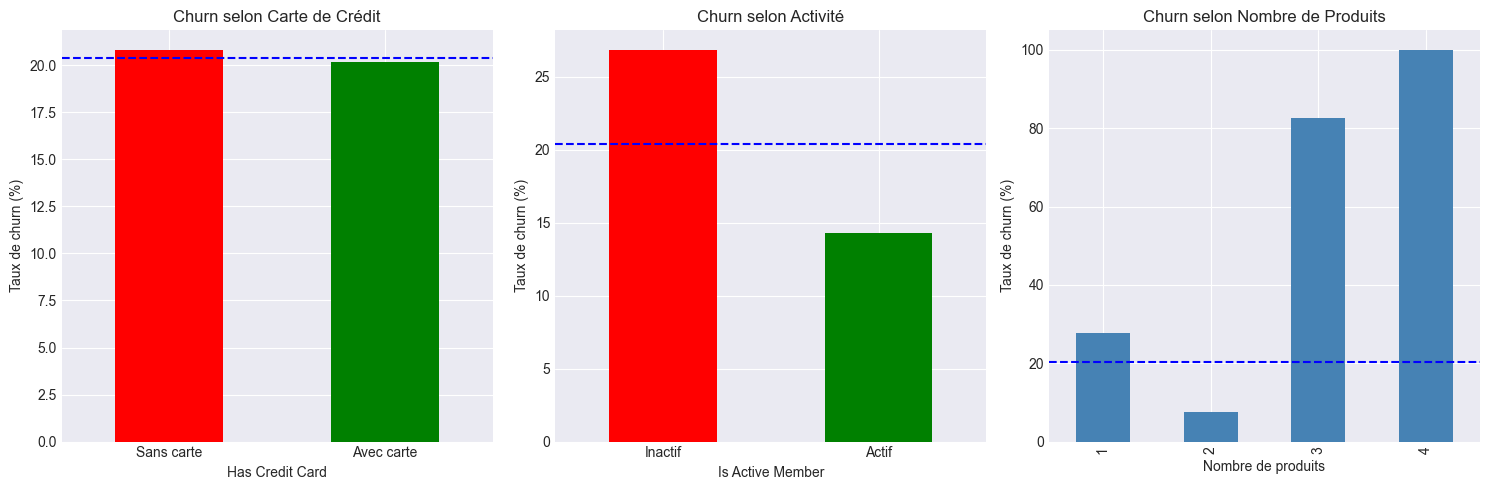

In [18]:
# Analyser toutes les variables binaires d'un coup
binary_vars = ['Has Credit Card', 'Is Active Member', 'Num Of Products']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Has Credit Card
churn_cc = df.groupby('Has Credit Card')['Churn'].mean() * 100
churn_cc.plot(kind='bar', ax=axes[0], color=['red', 'green'])
axes[0].set_title('Churn selon Carte de Crédit')
axes[0].set_xticklabels(['Sans carte', 'Avec carte'], rotation=0)
axes[0].set_ylabel('Taux de churn (%)')
axes[0].axhline(y=20.37, color='blue', linestyle='--')

# Is Active Member
churn_active = df.groupby('Is Active Member')['Churn'].mean() * 100
churn_active.plot(kind='bar', ax=axes[1], color=['red', 'green'])
axes[1].set_title('Churn selon Activité')
axes[1].set_xticklabels(['Inactif', 'Actif'], rotation=0)
axes[1].set_ylabel('Taux de churn (%)')
axes[1].axhline(y=20.37, color='blue', linestyle='--')

# Num Of Products
churn_products = df.groupby('Num Of Products')['Churn'].mean() * 100
churn_products.plot(kind='bar', ax=axes[2], color='steelblue')
axes[2].set_title('Churn selon Nombre de Produits')
axes[2].set_xlabel('Nombre de produits')
axes[2].set_ylabel('Taux de churn (%)')
axes[2].axhline(y=20.37, color='blue', linestyle='--')

plt.tight_layout()
plt.show()

In [19]:
print("Distribution du nombre de produits:")
print(df['Num Of Products'].value_counts().sort_index())
print("\nTaux de churn par nombre de produits:")
print(df.groupby('Num Of Products')['Churn'].agg(['count', 'sum', 'mean']))

Distribution du nombre de produits:
Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Taux de churn par nombre de produits:
                 count   sum      mean
Num Of Products                       
1                 5084  1409  0.277144
2                 4590   348  0.075817
3                  266   220  0.827068
4                   60    60  1.000000
